# Futbol analisis

## Indice
* [Imports](#imports)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_1_1)
        * [Sub Section 2.1.1](#sub_section_1_1_1)

## Imports <a class="anchor" id="imports"></a>

In [314]:
# Libreria Statsbomb
from statsbombpy import sb

import pandas as pd
import numpy as np
from pandas import json_normalize

import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, Sbopen
import matplotlib.patheffects as path_effects

In [315]:
# Obtenemos las competiciones
competicion = sb.competitions()
competicion.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [316]:
# Obtenemos las competiciones
partidos = sb.matches(competition_id=11,season_id=90)
partidos.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,available,2021-02-24T16:46:37.954522,2022-08-04T12:00,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
1,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,available,2021-03-13T21:42:56.642447,2022-08-04T12:00,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
2,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,available,2021-04-25T19:46:09.138046,2022-08-04T12:00,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
3,3773660,2020-12-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Levante,1,0,available,available,2020-12-14T19:50:12.485814,2022-08-04T12:00,13,Regular Season,Spotify Camp Nou,Ricardo De Burgos Bengoetxea,Ronald Koeman,Francisco José López Fernández,1.1.0,2,2
4,3773593,2020-09-27,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Villarreal,4,0,available,available,2020-09-29T07:17:09.292323,2022-08-04T12:00,3,Regular Season,Spotify Camp Nou,Guillermo Cuadra Fernández,Ronald Koeman,Unai Emery Etxegoien,1.1.0,2,2


In [317]:
sb.events(match_id=3773497).head

<bound method NDFrame.head of      bad_behaviour_card ball_receipt_outcome  ...            type under_pressure
0                   NaN                  NaN  ...     Starting XI            NaN
1                   NaN                  NaN  ...     Starting XI            NaN
2                   NaN                  NaN  ...      Half Start            NaN
3                   NaN                  NaN  ...      Half Start            NaN
4                   NaN                  NaN  ...      Half Start            NaN
...                 ...                  ...  ...             ...            ...
3986                NaN                  NaN  ...        Half End            NaN
3987                NaN                  NaN  ...  Tactical Shift            NaN
3988                NaN                  NaN  ...  Tactical Shift            NaN
3989        Yellow Card                  NaN  ...   Bad Behaviour            NaN
3990        Yellow Card                  NaN  ...   Bad Behaviour            Na

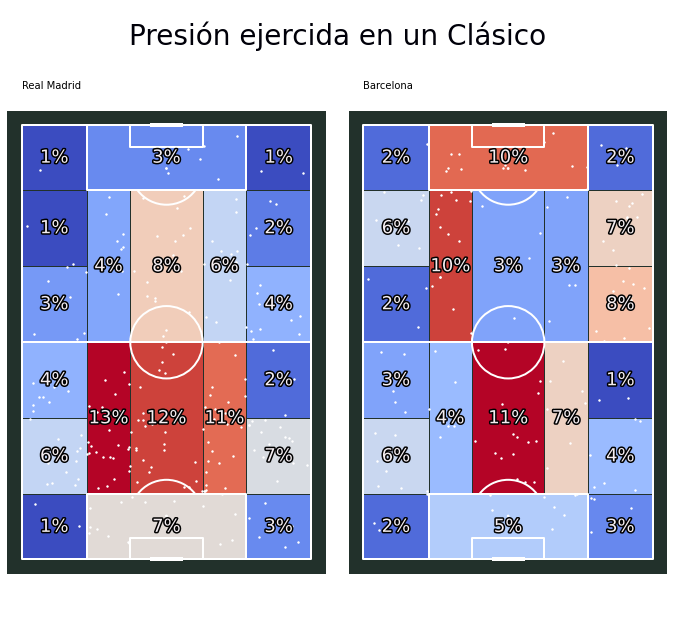

In [497]:
parser = Sbopen()
df = sb.events(match_id=3773497)
rm_pressure = df.loc[df['team'] == 'Real Madrid']
rm_pressure = rm_pressure.loc[df['type'] == 'Pressure']
rm_pressure = rm_pressure.location
rm_pressure = rm_pressure.dropna()

bar_pressure = df.loc[df['team'] == 'Barcelona']
bar_pressure = bar_pressure.loc[df['type'] == 'Pressure']
bar_pressure = bar_pressure.location
bar_pressure = bar_pressure.dropna()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]

# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
# draw
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)

bin_statistic_rm = pitch.bin_statistic_positional(rm_pressure.str[0], rm_pressure.str[1], statistic='count',
                                               positional='full', normalize=True)
heatmap_rm = pitch.heatmap_positional(bin_statistic_rm, ax=axs['pitch'][0], cmap='coolwarm', edgecolors='#22312b')
scatter_rm = pitch.scatter(rm_pressure.str[0], rm_pressure.str[1], c='white', s=2, ax=axs['pitch'][0])
labels_rm = pitch.label_heatmap(bin_statistic_rm, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'][0], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
pitch.annotate('Real Madrid', xy =(0, 0),
                xytext =(130, 0), ax=axs['pitch'][0], )

bin_statistic_bar = pitch.bin_statistic_positional(bar_pressure.str[0], bar_pressure.str[1], statistic='count',
                                               positional='full', normalize=True)
heatmap_bar = pitch.heatmap_positional(bin_statistic_bar, ax=axs['pitch'][1], cmap='coolwarm', edgecolors='#22312b')
scatter_bar = pitch.scatter(bar_pressure.str[0], bar_pressure.str[1], c='white', s=2, ax=axs['pitch'][1])
labels_bar = pitch.label_heatmap(bin_statistic_bar, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
pitch.annotate('Barcelona', xy =(0, 0),
                xytext =(130, 0), ax=axs['pitch'][1])

title1_text = axs['title'].text(0.5, 0.7, "Presión ejercida en un Clásico", fontsize=28, color='#000009', ha='center', va='center')

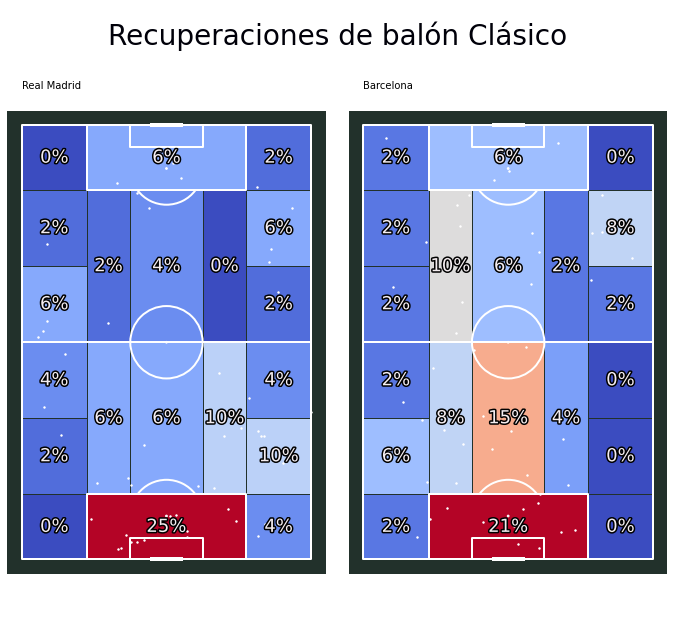

In [498]:
parser = Sbopen()
df = sb.events(match_id=3773497)
rm_pressure = df.loc[df['team'] == 'Real Madrid']
rm_pressure = rm_pressure.loc[df['type'] == 'Ball Recovery']
rm_pressure = rm_pressure.location

bar_pressure = df.loc[df['team'] == 'Barcelona']
bar_pressure = bar_pressure.loc[df['type'] == 'Ball Recovery']
bar_pressure = bar_pressure.location

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]
rm_pressure = rm_pressure.dropna()
bar_pressure = bar_pressure.dropna()
# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
# draw
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)

bin_statistic_rm = pitch.bin_statistic_positional(rm_pressure.str[0], rm_pressure.str[1], statistic='count',
                                               positional='full', normalize=True)
heatmap_rm = pitch.heatmap_positional(bin_statistic_rm, ax=axs['pitch'][0], cmap='coolwarm', edgecolors='#22312b')
scatter_rm = pitch.scatter(rm_pressure.str[0], rm_pressure.str[1], c='white', s=2, ax=axs['pitch'][0])
labels_rm = pitch.label_heatmap(bin_statistic_rm, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'][0], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
pitch.annotate('Real Madrid', xy =(0, 0),
                xytext =(130, 0), ax=axs['pitch'][0], )

bin_statistic_bar = pitch.bin_statistic_positional(bar_pressure.str[0], bar_pressure.str[1], statistic='count',
                                               positional='full', normalize=True)
heatmap_bar = pitch.heatmap_positional(bin_statistic_bar, ax=axs['pitch'][1], cmap='coolwarm', edgecolors='#22312b')
scatter_bar = pitch.scatter(bar_pressure.str[0], bar_pressure.str[1], c='white', s=2, ax=axs['pitch'][1])
labels_bar = pitch.label_heatmap(bin_statistic_bar, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
pitch.annotate('Barcelona', xy =(0, 0),
                xytext =(130, 0), ax=axs['pitch'][1])

title1_text = axs['title'].text(0.5, 0.7, "Recuperaciones de balón Clásico", fontsize=28, color='#000009', ha='center', va='center')

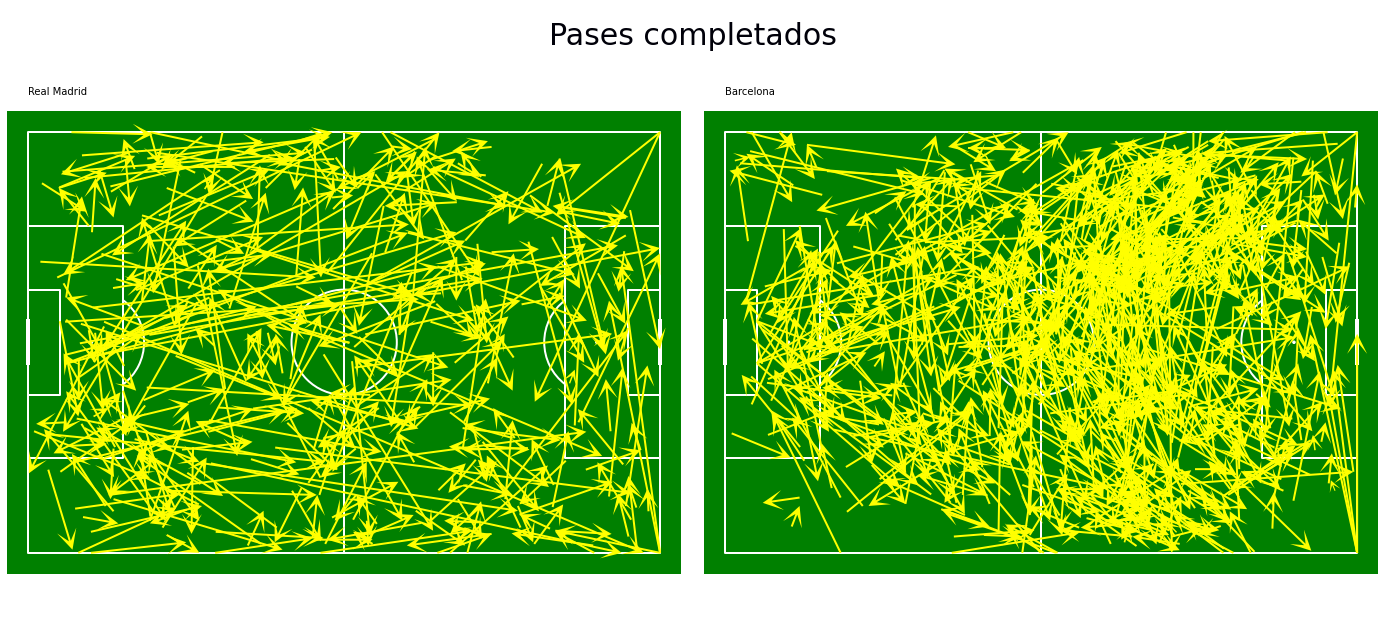

In [499]:
parser = Sbopen()
df = sb.events(match_id=3773497)
rm_pressure = df.loc[df['team'] == 'Real Madrid']
rm_pressure = rm_pressure.loc[df['type'] == 'Pass']
pd.set_option('display.max_columns', None)
rm_pressure = rm_pressure[['location','pass_end_location']]
rm_pressure = rm_pressure.dropna()

bar_pressure = df.loc[df['team'] == 'Barcelona']
bar_pressure = bar_pressure.loc[df['type'] == 'Pass']
bar_pressure = bar_pressure[['location','pass_end_location']]

bar_pressure = bar_pressure.dropna()

# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05,)

fig.set_facecolor('white')

# Plot the completed passes
pitch.arrows(rm_pressure['location'].str[0], rm_pressure['location'].str[1],
             rm_pressure['pass_end_location'].str[0], rm_pressure['pass_end_location'].str[1], width=2,
             headwidth=10, headlength=10, color='yellow', ax=axs['pitch'][0], label='completed passes')
pitch.annotate('Real Madrid', xy =(0, 0),
                xytext =(0, -7), ax=axs['pitch'][0])
# Plot the completed passes
pitch.arrows(bar_pressure['location'].str[0], bar_pressure['location'].str[1],
             bar_pressure['pass_end_location'].str[0], bar_pressure['pass_end_location'].str[1], width=2,
             headwidth=10, headlength=10, color='yellow', ax=axs['pitch'][1], label='completed passes')
pitch.annotate('Barcelona', xy =(0, 0),
                xytext =(0, -7), ax=axs['pitch'][1])
# Set the title
title1_text = axs['title'].text(0.5, 0.7, 'Pases completados', fontsize=30, color='#000009', ha='center', va='center')

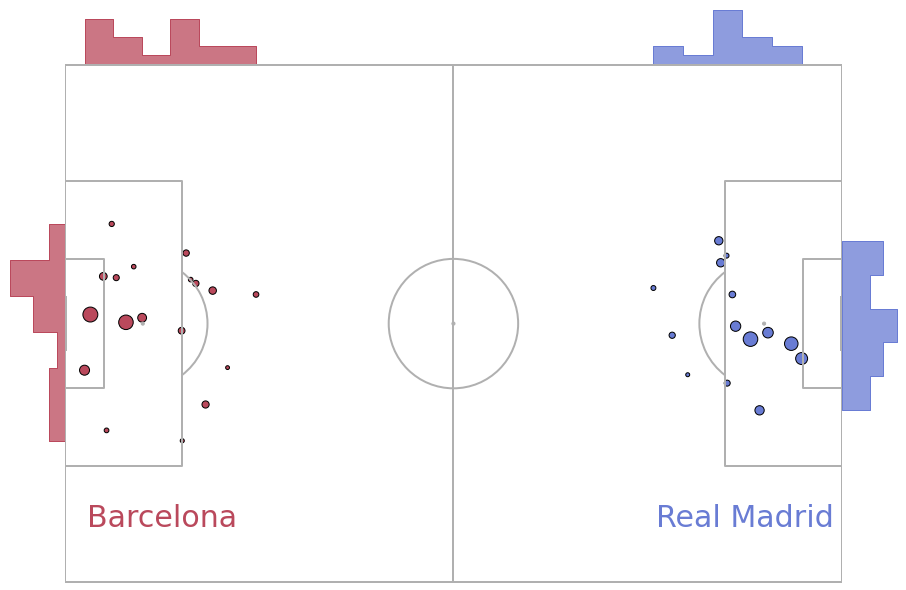

In [500]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3773497)
# setup the mplsoccer StatsBomb Pitches
# note not much padding around the pitch so the marginal axis are tight to the pitch
# if you are using a different goal type you will need to increase the padding to see the goals
pitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=2)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)

# subset the shots
df_shots = df[df.type_name == 'Shot'].copy()

# subset the shots for each team
team1, team2 = df_shots.team_name.unique()
df_team1 = df_shots[df_shots.team_name == team1].copy()
df_team2 = df_shots[df_shots.team_name == team2].copy()

# Usually in football, the data is collected so the attacking direction is left to right.
# We can shift the coordinates via: new_x_coordinate = right_side - old_x_coordinate
# This is helpful for having one team shots on the left of the pitch and the other on the right
df_team1['x'] = pitch.dim.right - df_team1.x

fig, axs = pitch.jointgrid(figheight=10,  # the figure is 10 inches high
                           left=None,  # joint grid center-aligned
                           bottom=0.075,  # grid starts 7.5% in from the bottom of the figure
                           marginal=0.1,  # marginal axes heights are 10% of grid height
                           space=0,  # 0% of the grid height reserved for space between axes
                           grid_width=0.9,  # the grid width takes up 90% of the figure width
                           title_height=0,  # plot without a title axes
                           axis=False,  # turn off title/ endnote/ marginal axes
                           endnote_height=0,  # plot without an endnote axes
                           grid_height=0.8)  # grid takes up 80% of the figure height
# we plot a usual scatter plot but the scatter size is based on expected goals
# note that the size is the expected goals * 700
# so any shots with an expected goals = 1 would take a size of 700 (points**2)
sc_team1 = pitch.scatter(df_team1.x, df_team1.y, s=df_team1.shot_statsbomb_xg * 700,
                         ec='black', color='#ba495c', ax=axs['pitch'])
sc_team2 = pitch.scatter(df_team2.x, df_team2.y, s=df_team2.shot_statsbomb_xg * 700,
                         ec='black', color='#697cd4', ax=axs['pitch'])
# (step) histograms on each of the left, top, and right marginal axes
team1_hist_y = sns.histplot(y=df_team1.y, ax=axs['left'], element='step', color='#ba495c')
team1_hist_x = sns.histplot(x=df_team1.x, ax=axs['top'], element='step', color='#ba495c')
team2_hist_x = sns.histplot(x=df_team2.x, ax=axs['top'], element='step', color='#697cd4')
team2_hist_y = sns.histplot(y=df_team2.y, ax=axs['right'], element='step', color='#697cd4')
txt1 = axs['pitch'].text(x=15, y=70, s=team1, color='#ba495c',
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=105, y=70, s=team2, color='#697cd4',
                         ha='center', va='center', fontsize=30)